# Image Segmentation


- Segmentation partitions an image into regions having similar visual appearance corresponding to parts of objects
- We will try to extract the most dominant 'K' Colors using K-Means
- We can apply K-Means with each pixel will reassigned to the closest of the K Colors, leading to segmentation

<img src="img/example.png" alt="Pizza-1" style="width: 800px;"/>



Fig : Image Segmentation with multiple values of K

### 1. Preprocessing The Image

In [191]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

(330, 500, 3)


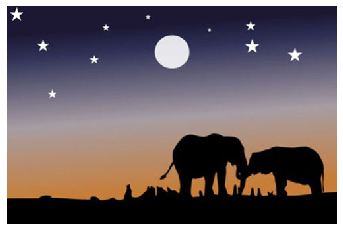

In [192]:
im = cv2.imread('img/elephant.jpg')
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
print(im.shape)

plt.axis('off')
plt.imshow(im)
plt.show()

In [193]:
# Flatten all the 3 Image channels
all_pixels = im.reshape((-1,3))
print(all_pixels.shape)

(165000, 3)


### 2. Dominant Color Extraction

In [194]:
from sklearn.cluster import KMeans

In [195]:
dominant_colors = 4
km = KMeans(n_clusters=dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [196]:
centers = km.cluster_centers_
centers = np.array(centers,dtype='uint8')

In [197]:
print(centers)

[[  1   0   1]
 [174 145 128]
 [ 38  35  64]
 [ 99  95 118]]


#### Plotting the dominant colors

4 Most Dominant Colors in Image are : 


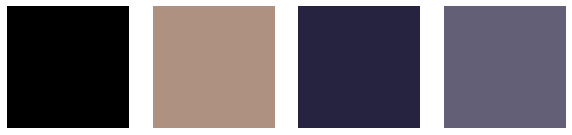

In [198]:
i = 1
print("4 Most Dominant Colors in Image are : ")
plt.figure(0,figsize=(10,4))
colors = []
for col in centers:
    plt.subplot(1,4,i);
    plt.axis('off')
    i += 1
    colors.append(col)
    a = np.zeros((100,100,3),dtype='uint8')
    a[:,:,:] = col
    plt.imshow(a)
plt.show()

### 3. Segmenting The Image

In [199]:
new_img = np.zeros((330*500,3),dtype='uint8')
print(new_img.shape)

(165000, 3)


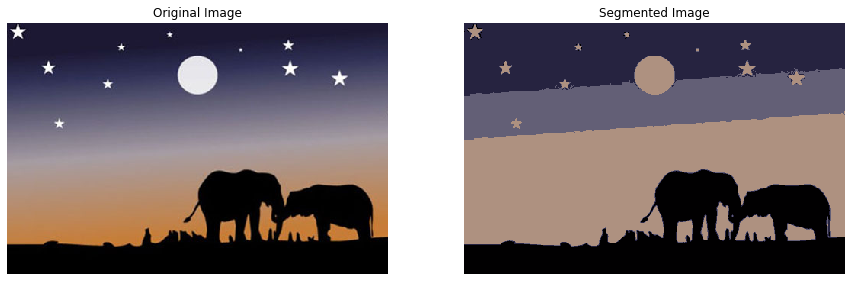

In [200]:
for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
new_img = new_img.reshape((330,500,3))

plt.figure(1,figsize=(15,15))
plt.subplot(1,2,1)
plt.title("Original Image")
plt.axis('off')
plt.imshow(im)
plt.subplot(1,2,2)

plt.title("Segmented Image")
plt.axis('off')
plt.imshow(new_img)
plt.show()